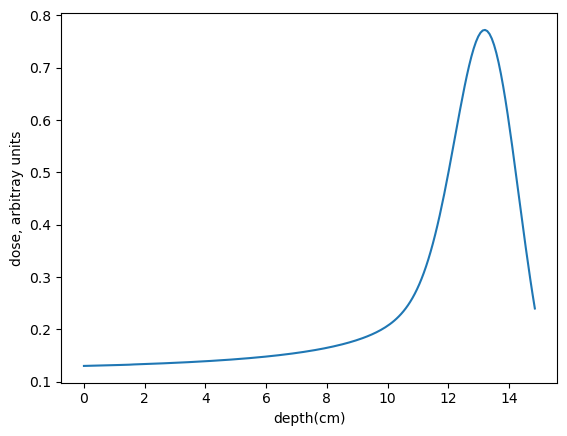

In [2]:

import numpy as np
from matplotlib import pyplot as plt
from scipy import special
import math

def cyl_gauss(a,x):
    "Calculate product of Gaussian and parabolic cylinder function"
    y = np.copy(x)
    branch = -12.0   #for large negative values of the argument we run into numerical problems, need to approximate result
    x1 = x[np.where(x<branch)]
    y1 = math.sqrt(2*math.pi)/special.gamma(-a)*(-x1)**(-a-1)
    y[np.where(x<branch)] = y1

    x2 = x[np.where(x>=branch)]
    y2a = special.pbdv(a,x2)[0]     #special function yielding parabolic cylinder function, first array [0] is function itself
    y2b = np.exp(-x2*x2/4)
    y2 = y2a*y2b

    y[np.where(x>=branch)] = y2

    return y

def BragFit(R0,sigma,epsilon,p,z):
    # example for Harvard cyclotron beam (HCL)
    # modify parameters for other beams


    out = 0.65*(cyl_gauss(-1/p,(z-R0)/sigma)+sigma*(0.01394+epsilon/R0)*cyl_gauss(-1/p-1,(z-R0)/sigma))
    # from Eq 29 of reference [1]. 
    # the factor 0.65 is for normalization to ~1: 0.65=0.8/1.23. (cyl_gauss(-0.565,0)=1.23, bragg(R0)=0.8)
    return out

R0 = 13.5   #range
z = np.linspace(0,1.1*R0,200)
sigma = 1    #range straggling sigma
epsilon = 0.2   #low energy contamination
#p = 1.77    #exponent of range-energy relationship
p=5
plt.plot(z,BragFit(R0,sigma,epsilon,p,z))
plt.xlabel('depth(cm)')
plt.ylabel('dose, arbitray units')
plt.show()